# **Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts**

## **Data Exploration and Preprocessing:**

In [ ]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#After importing spaCy load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Define a function to clean the text
def clean_text_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Convert to lowercase, remove punctuation, and stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [ ]:
#Load the dataset
data=pd.read_csv('blogs.csv')

In [ ]:
#Apply the cleaning function to the dataset
data['Cleaned_Data'] = data['Data'].apply(clean_text_spacy)

In [ ]:
df = data[['Data', 'Cleaned_Data', 'Labels']]

In [ ]:
df.head()

,Data,Cleaned_Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe.srv.cs.cmu.edu!magnesium.club....,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroup alt.atheism \n path cantaloupe.srv.c...,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupe.srv.cs.cmu.edu!das news.harvar...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe.srv.cs.cmu.edu!magnesium.club....,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...,alt.atheism


## **Feature Extraction:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = tfidf.fit_transform(df['Cleaned_Data'])

# The labels (target variable)
y = df['Labels']


## **Naive Bayes Model for Text Classification:**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Train the Naive Bayes Model and Make Predictions:**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)



## **Sentiment Analysis:**

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    # Sentiment polarity ranges from -1 (negative) to 1 (positive)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to the cleaned data
df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

# Display the first few rows with sentiment
df[['Cleaned_Data', 'Labels', 'Sentiment']].head()


<ipython-input-13-0db8f45ace05>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)


,Cleaned_Data,Labels,Sentiment
0,path cantaloupe.srv.cs.cmu.edu!magnesium.club....,alt.atheism,Positive
1,newsgroup alt.atheism \n path cantaloupe.srv.c...,alt.atheism,Negative
2,path cantaloupe.srv.cs.cmu.edu!das news.harvar...,alt.atheism,Positive
3,path cantaloupe.srv.cs.cmu.edu!magnesium.club....,alt.atheism,Positive
4,Xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...,alt.atheism,Positive


## **Evaluation:**

### **Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.81
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.79      1.00      0.88        22
comp.sys.ibm.pc.hardware       0.70      0.84      0.76        25
   comp.sys.mac.hardware       0.82      0.67      0.74        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.79      0.83      0.81        18
               rec.autos       0.85      0.94      0.89        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.85      0.94      0.89        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.79      0.69      0.73        16
                 sci.med       0.88 

### **Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.**

In [ ]:
# Group by Labels and Sentiment to see the distribution
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
sentiment_distribution


Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,37.0,0.0,63.0
comp.graphics,39.0,0.0,61.0
comp.os.ms-windows.misc,35.0,0.0,65.0
comp.sys.ibm.pc.hardware,32.0,0.0,68.0
comp.sys.mac.hardware,34.0,0.0,66.0
comp.windows.x,33.0,0.0,67.0
misc.forsale,25.0,0.0,75.0
rec.autos,29.0,0.0,71.0
rec.motorcycles,30.0,0.0,70.0


# **Overall Sentiment Trends:**
### **Positive Sentiment Dominance:**
Most categories exhibit a high percentage of positive sentiment, often above 60%. This indicates that the content in these categories is generally favorable, uplifting, or supportive.
Categories such as **misc.forsale, rec.autos, sci.electronics, talk.religion.misc** have particularly high positive sentiment (around 70-75%), suggesting that these topics often involve positive discussions, satisfaction, or constructive content.
### **Negative Sentiment Presence:**

Negative sentiment, while generally lower than positive sentiment, still holds a significant presence in some categories, particularly in discussions that might involve criticism, debate, or controversy.
Categories like **rec.sport.hockey, talk.politics.guns, and talk.politics.mideast** show higher negative sentiment, with around 49-51%, indicating a more polarized or contentious nature of discussions in these areas.
### **Neutral Sentiment:**

Neutral sentiment is nearly absent across all categories, with the only exception being a slight neutral sentiment (1%) in **rec.sport.baseball**. This suggests that most blog posts express clear opinions or emotions, either positive or negative, rather than neutral or factual content.

### **Generate Wordcloud:**

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

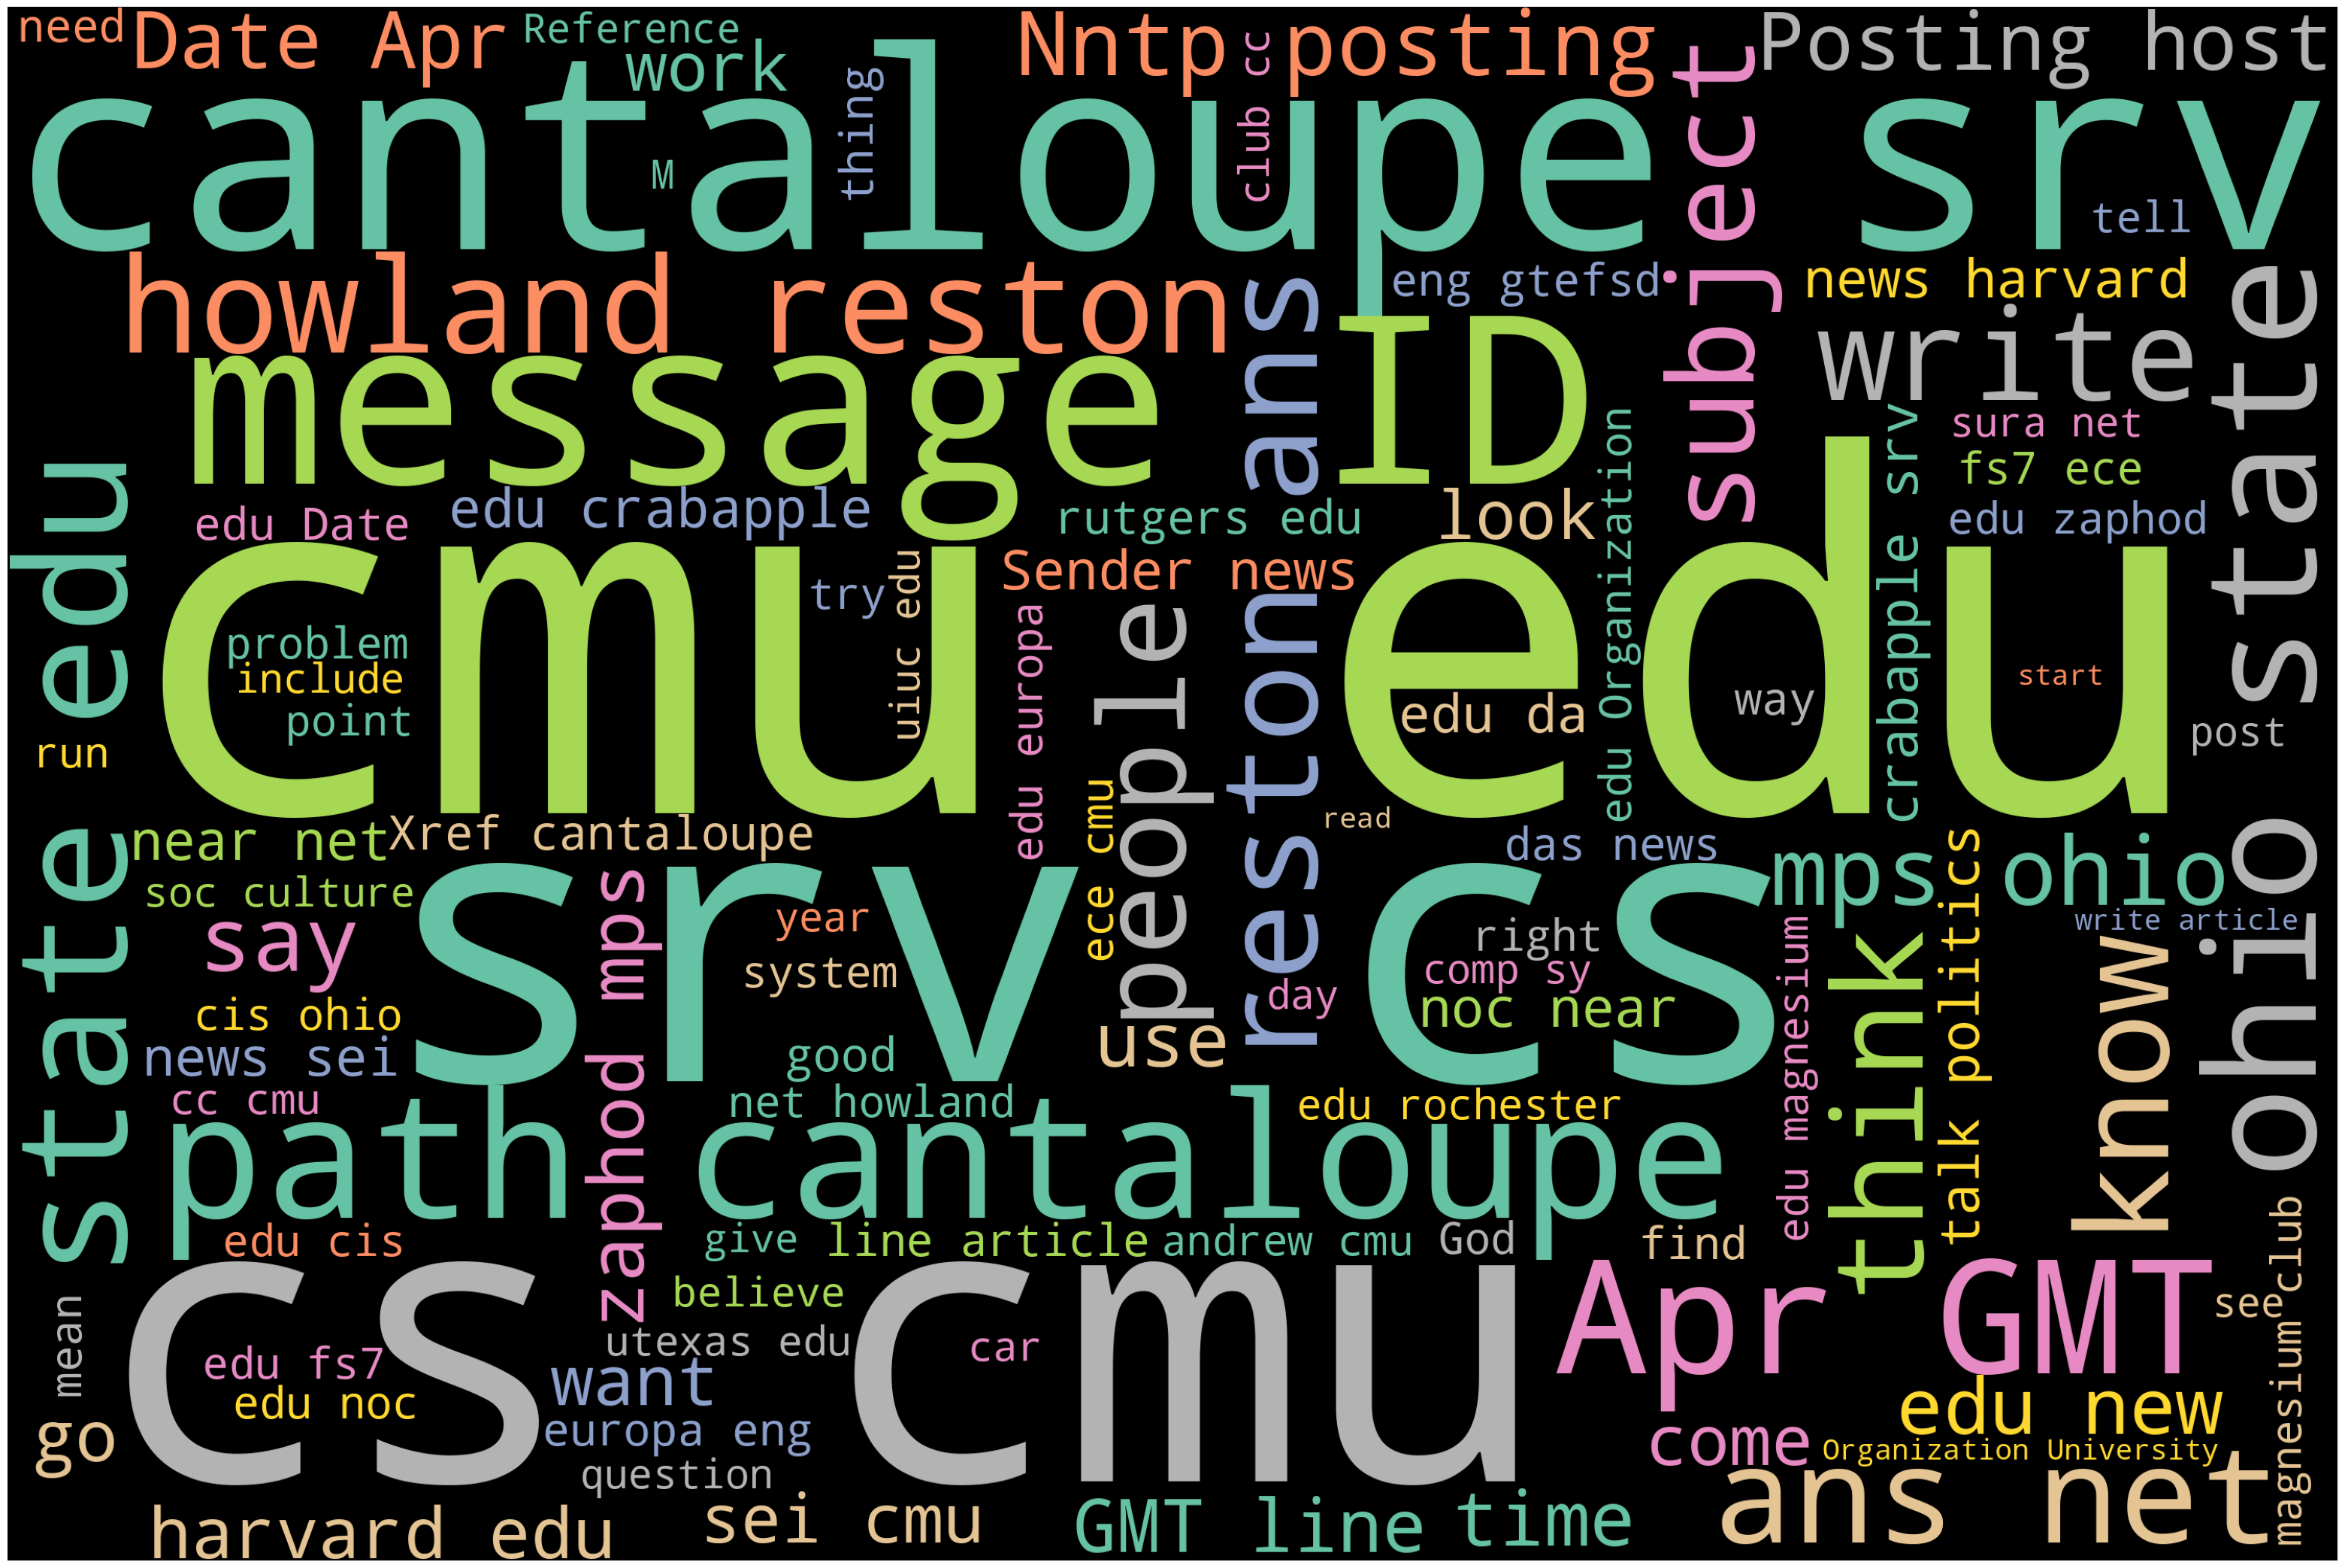

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
text = ' '.join(df['Cleaned_Data'])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

The combination of Naive Bayes classification and sentiment analysis provides a comprehensive view of the dataset. By understanding both the categorical distribution and the emotional tone of the blog posts, you can make informed decisions about content creation, model improvement, and audience engagement strategies.

##**Conclusion:**

The sentiment analysis reveals a nuanced landscape of emotional expression across different blog categories. While positive sentiment generally dominates, indicating an overall favorable tone in the blog posts, certain categories—particularly those related to sports and politics—exhibit a more balanced or even negative sentiment, suggesting areas of contention or debate. These insights can inform content strategy and community management, helping to tailor content to the specific emotional dynamics of each category.